### This project is all about visualizing different forces
    1. Unbalance Force
    2. Oscillating Force
    3. Centrifugal Force
    4. Tangential Force

Enter Unbalance Magnitude in kg.m: 1e-6
Enter Unbalance Orientation in degree: 30
Enter Rotational Speed in rpm: 100000


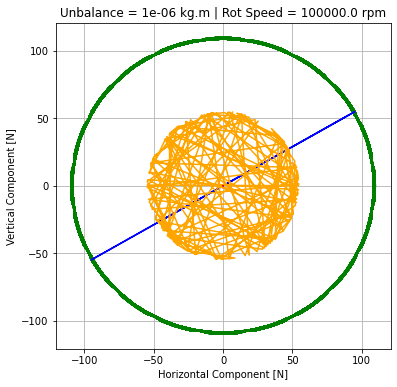

In [3]:
# 1 Rotating force due to unbalance
import math
import matplotlib.pyplot as plt

ub = float(input("Enter Unbalance Magnitude in kg.m: "))
ph = float(input("Enter Unbalance Orientation in degree: "))
rpm = float(input("Enter Rotational Speed in rpm: "))

npts = int(rpm/60*20*0.5)
delt = 0.5/npts
omg = 2*math.pi*rpm/60
ph = ph*math.pi/180

#### Rotating Unbalance Force Computation ####

Fub_H = []
Fub_V = []

for i in range(1,npts+1,1):
    Fub_H.append(ub*omg**2*(math.cos(i*omg*delt + ph)))
    Fub_V.append(ub*omg**2*(math.sin(i*omg*delt + ph)))

#### Osicllating Force Computation ####

Fo_H = []
Fo_V = []

for i in range(1,npts+1,1):
    Fo_H.append(ub*omg**2*(math.cos(i*omg*delt))*math.cos(ph))
    Fo_V.append(ub*omg**2*(math.cos(i*omg*delt))*math.sin(ph))

#### Centrifugal Force Computation ####

Fc_H = []
Fc_V = []

for i in range(1,npts+1,1):
    Fc_H.append(ub*((-1*(omg/0.5*i*delt)**2)*math.sin((omg/0.5*i*delt)**2)/2))
    Fc_V.append(ub*((-1*(omg/0.5*i*delt)**2)*math.cos((omg/0.5*i*delt)**2)/2))

#### Tangential Force Computation ####

Ft_H = []
Ft_V = []

for i in range(1,npts+1,1):
    Ft_H.append(ub*(omg/0.5*math.cos((omg/0.5*i*delt)**2)/2))
    Ft_V.append(ub*(omg/0.5*math.sin((omg/0.5*i*delt)**2)/2))
    
fig = plt.figure(figsize=(6,6)) # (Figzize = (6,6)) sets the image size to a square.
plt.title(f"Unbalance = {ub} kg.m | Rot Speed = {rpm} rpm")
plt.xlabel('Horizontal Component [N]')
plt.ylabel('Vertical Component [N]')
plt.plot(Fub_H,Fub_V, color = 'green')
plt.plot(Fo_H,Fo_V, color = 'blue')
plt.plot(Fc_H[-128:],Fc_V[-128:], color = 'orange')
plt.plot(Ft_H,Ft_V, color = 'red')

plt.grid()
plt.savefig("03_Transient_Forces.png", dpi=300, quality = 99) 
# Use plt.savefig(f'Fub_{ub}_{rpm}.png') for saving with variable name.
# dpi = 300 for good quality images
